############################### FIRST VISIT #################################
For n_clusters = 15 The average silhouette_score is : -0.015485495278809493


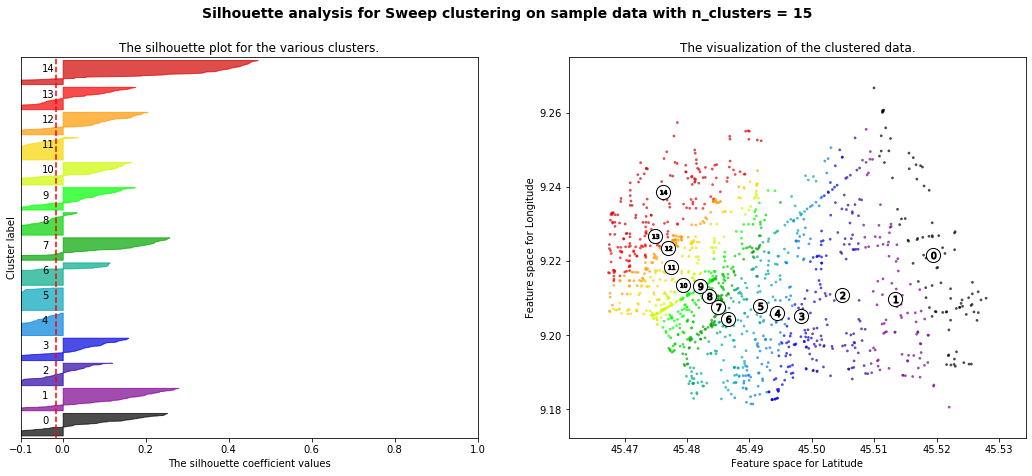

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,40621.100000,40 Km 621.10 m.,1:35:02,3:07:02,5702.500000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,42937.300000,42 Km 937.30 m.,1:39:26,3:11:26,5966.700000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,42123.500000,42 Km 123.50 m.,1:31:02,3:03:02,5462.900000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,36007.699000,36 Km 7.70 m.,1:17:44,2:49:44,4664.500000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,35335.798000,35 Km 335.80 m.,1:19:39,2:51:39,4779.100000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,38377.400000,38 Km 377.40 m.,1:27:31,2:59:31,5251.200000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,33154.399000,33 Km 154.40 m.,1:12:28,2:44:28,4348.500000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,29672.598000,29 Km 672.60 m.,1:04:57,2:36:57,3897.100000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,27997.399000,27 Km 997.40 m.,1:01:49,2:33:49,3709.800000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,27765.199000,27 Km 765.20 m.,1:02:49,2:34:49,3769.200000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### SECOND VISIT #################################
For n_clusters = 15 The average silhouette_score is : -0.024408586222094266


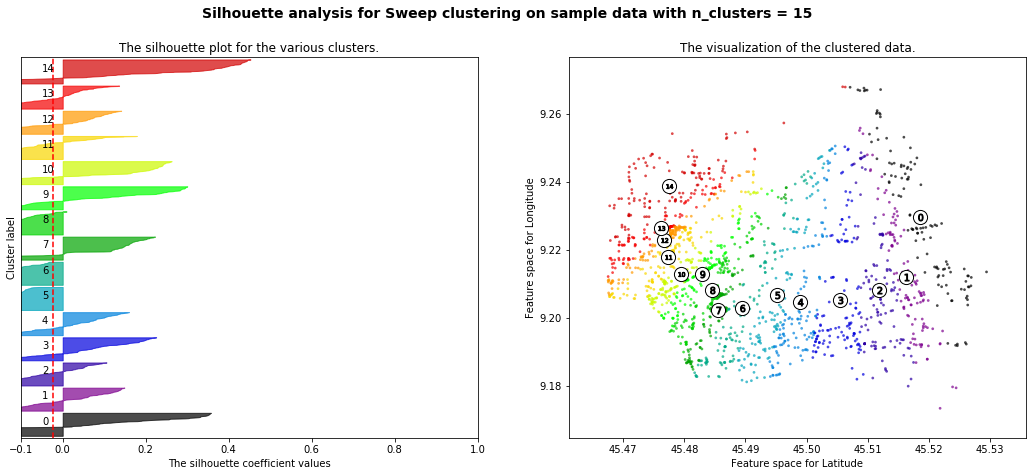

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,40558.200000,40 Km 558.20 m.,1:32:07,3:29:07,5527.800000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,42269.498000,42 Km 269.50 m.,1:36:21,3:33:21,5781.800000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,40491.599000,40 Km 491.60 m.,1:34:53,3:31:53,5693.700000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,43428.900000,43 Km 428.90 m.,1:38:43,3:35:43,5923.200000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,41791.299000,41 Km 791.30 m.,1:31:36,3:28:36,5496.700000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,39069.999000,39 Km 70.00 m.,1:28:12,3:25:12,5292.500000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,39561.700000,39 Km 561.70 m.,1:29:37,3:26:37,5377.200000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,33556.900000,33 Km 556.90 m.,1:19:02,3:16:02,4742.700000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,31514.000000,31 Km 514.00 m.,1:11:48,3:08:48,4308.700000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,29363.698000,29 Km 363.70 m.,1:07:01,3:04:01,4021.600000,117.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### FIRST VISIT #################################
For n_clusters = 16 The average silhouette_score is : -0.02055577606403378


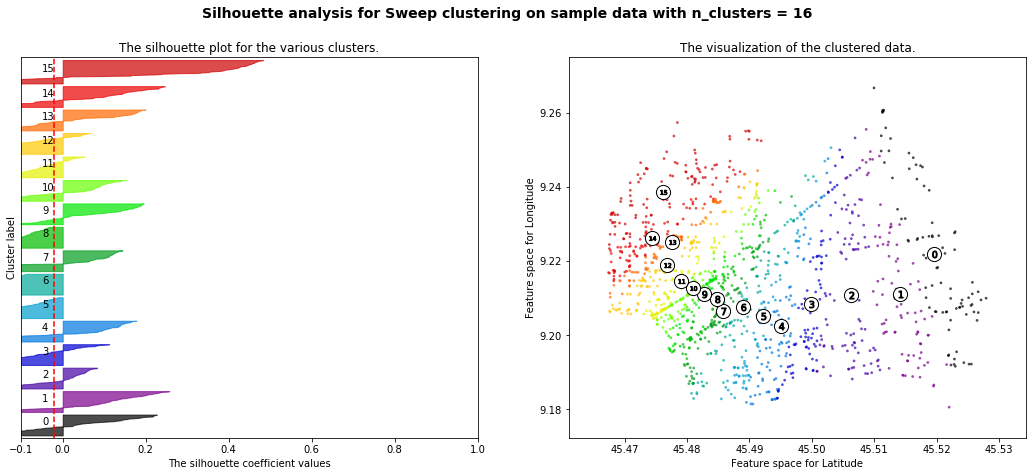

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,38481.40000,38 Km 481.40 m.,1:30:29,2:56:29,5429.9000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,42599.39900,42 Km 599.40 m.,1:36:48,3:02:48,5808.0000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,39551.29900,39 Km 551.30 m.,1:29:42,2:55:42,5382.6000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,36006.79800,36 Km 6.80 m.,1:14:41,2:40:41,4481.5000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,33210.20000,33 Km 210.20 m.,1:14:40,2:40:40,4480.0000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,30517.80000,30 Km 517.80 m.,1:08:39,2:34:39,4119.2000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,35317.19800,35 Km 317.20 m.,1:19:54,2:45:54,4794.2000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,30445.40000,30 Km 445.40 m.,1:09:19,2:35:19,4159.9000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,29335.50000,29 Km 335.50 m.,1:01:00,2:27:00,3660.7000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,28514.00000,28 Km 514.00 m.,1:05:03,2:31:03,3903.0000,86.0000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### SECOND VISIT #################################
For n_clusters = 16 The average silhouette_score is : -0.026080603800241752


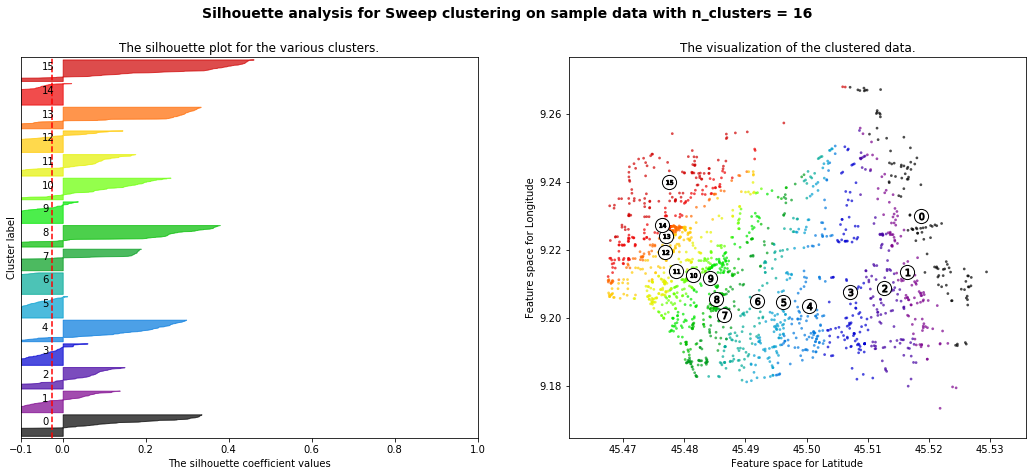

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,38227.1000,38 Km 227.10 m.,1:27:01,3:17:01,5221.9000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,42897.2000,42 Km 897.20 m.,1:35:06,3:25:06,5706.2000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,42849.6990,42 Km 849.70 m.,1:40:05,3:30:05,6005.1000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,38015.5000,38 Km 15.50 m.,1:28:13,3:18:13,5293.0000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,39438.9000,39 Km 438.90 m.,1:31:42,3:21:42,5502.7000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,37559.6000,37 Km 559.60 m.,1:21:07,3:11:07,4867.6000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,38891.2000,38 Km 891.20 m.,1:27:42,3:17:42,5262.3000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,36145.8990,36 Km 145.90 m.,1:19:16,3:09:16,4756.2000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,27635.8970,27 Km 635.90 m.,1:02:36,2:52:36,3756.9000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,32932.5980,32 Km 932.60 m.,1:13:32,3:03:32,4412.7000,110.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### FIRST VISIT #################################
For n_clusters = 17 The average silhouette_score is : -0.03103087701530733


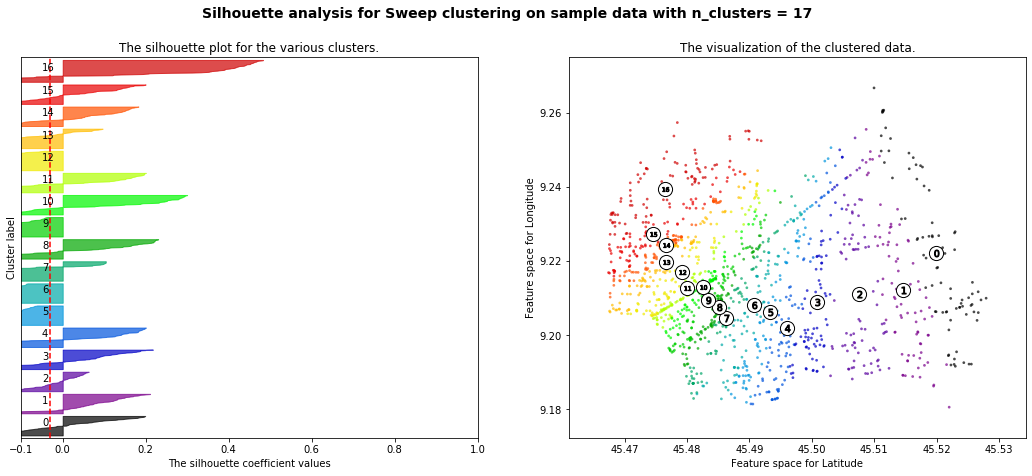

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,35822.700000,35 Km 822.70 m.,1:24:51,2:45:51,5091.400000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,42291.700000,42 Km 291.70 m.,1:35:18,2:56:18,5718.100000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,36139.700000,36 Km 139.70 m.,1:19:47,2:40:47,4787.500000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,38108.097000,38 Km 108.10 m.,1:17:23,2:38:23,4643.900000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,31946.899000,31 Km 946.90 m.,1:12:14,2:33:14,4334.200000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,30113.499000,30 Km 113.50 m.,1:06:29,2:27:29,3989.100000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,35191.699000,35 Km 191.70 m.,1:19:19,2:40:19,4759.000000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,31814.700000,31 Km 814.70 m.,1:10:29,2:31:29,4229.500000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,29620.098000,29 Km 620.10 m.,1:05:19,2:26:19,3919.000000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,26741.199000,26 Km 741.20 m.,0:57:16,2:18:16,3436.400000,81.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### SECOND VISIT #################################
For n_clusters = 17 The average silhouette_score is : -0.03658932452911375


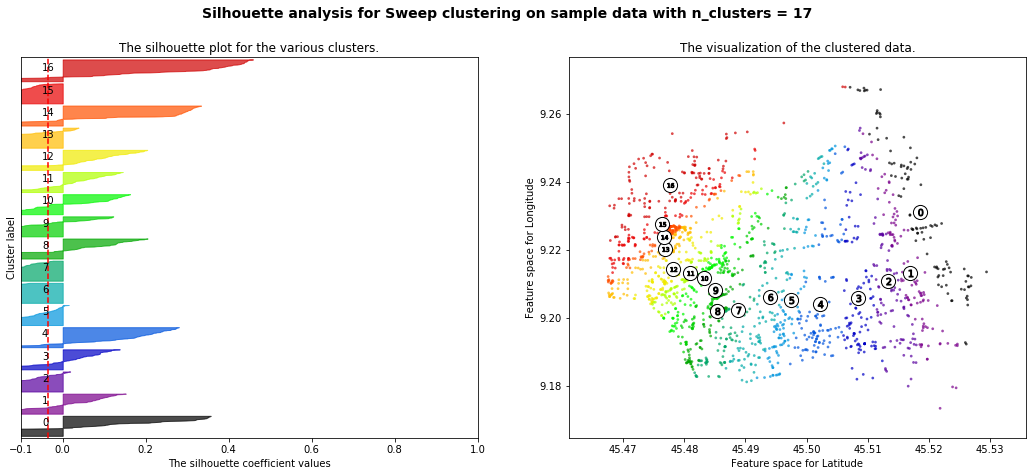

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,36548.500000,36 Km 548.50 m.,1:23:37,3:06:37,5017.900000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,42322.999000,42 Km 323.00 m.,1:36:47,3:19:47,5807.300000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,39327.700000,39 Km 327.70 m.,1:33:09,3:16:09,5589.100000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,36298.099000,36 Km 298.10 m.,1:25:43,3:08:43,5143.300000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,37093.299000,37 Km 93.30 m.,1:24:04,3:07:04,5044.100000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,35292.100000,35 Km 292.10 m.,1:17:43,3:00:43,4663.700000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,40061.400000,40 Km 61.40 m.,1:29:09,3:12:09,5349.200000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,37613.999000,37 Km 614.00 m.,1:24:31,3:07:31,5071.600000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,32396.600000,32 Km 396.60 m.,1:16:03,2:59:03,4563.200000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,27684.699000,27 Km 684.70 m.,1:03:39,2:46:39,3819.200000,103.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### FIRST VISIT #################################
For n_clusters = 18 The average silhouette_score is : -0.028396602258448072


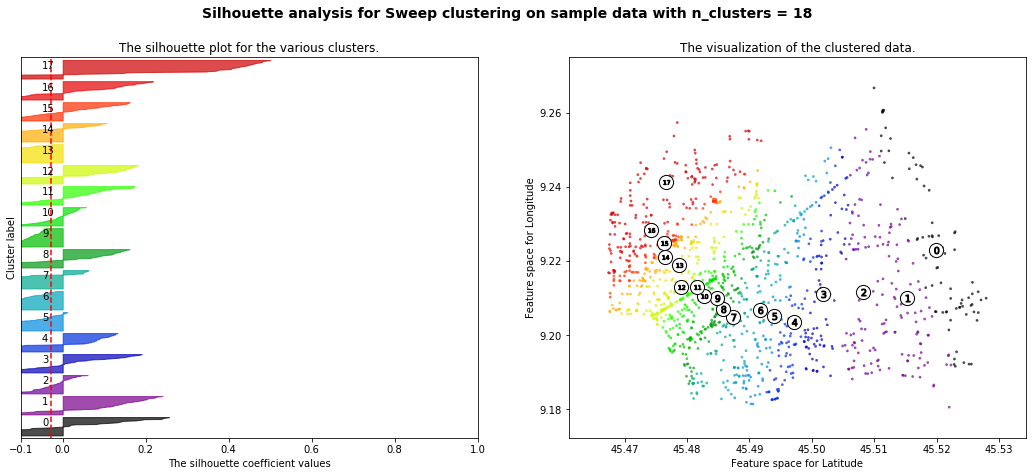

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,35490.900000,35 Km 490.90 m.,1:23:11,2:40:11,4991.600000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,41326.500000,41 Km 326.50 m.,1:34:01,2:51:01,5641.300000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,35074.800000,35 Km 74.80 m.,1:16:36,2:33:36,4596.300000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,35523.100000,35 Km 523.10 m.,1:15:46,2:32:46,4546.200000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,31174.099000,31 Km 174.10 m.,1:11:01,2:28:01,4261.300000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,29815.097000,29 Km 815.10 m.,1:04:47,2:21:47,3887.500000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,34728.599000,34 Km 728.60 m.,1:19:54,2:36:54,4794.300000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,30440.998000,30 Km 441.00 m.,1:07:18,2:24:18,4038.000000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,26209.598000,26 Km 209.60 m.,1:00:07,2:17:07,3607.100000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,27778.900000,27 Km 778.90 m.,1:01:51,2:18:51,3711.600000,77.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### SECOND VISIT #################################
For n_clusters = 18 The average silhouette_score is : -0.04083764946312717


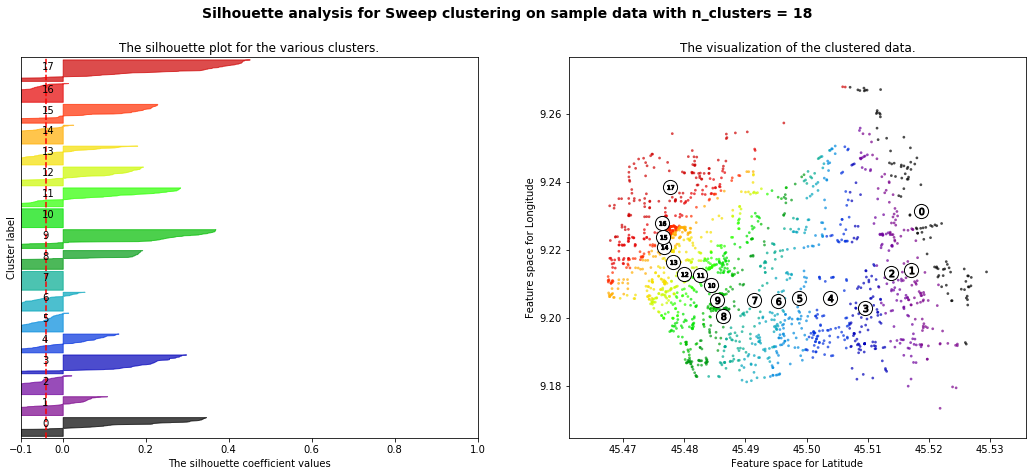

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,35706.600000,35 Km 706.60 m.,1:20:50,2:57:50,4850.100000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,40379.700000,40 Km 379.70 m.,1:27:47,3:04:47,5267.900000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,37963.900000,37 Km 963.90 m.,1:29:03,3:06:03,5343.600000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,35091.498000,35 Km 91.50 m.,1:21:47,2:58:47,4907.200000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,34248.099000,34 Km 248.10 m.,1:18:52,2:55:52,4732.600000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,38411.098000,38 Km 411.10 m.,1:22:20,2:59:20,4940.300000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,34783.100000,34 Km 783.10 m.,1:16:12,2:53:12,4572.500000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,38880.200000,38 Km 880.20 m.,1:26:23,3:03:23,5183.500000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,32777.699000,32 Km 777.70 m.,1:11:17,2:48:17,4277.300000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,27890.099000,27 Km 890.10 m.,1:01:24,2:38:24,3684.900000,97.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### FIRST VISIT #################################
For n_clusters = 19 The average silhouette_score is : -0.04819630074262102


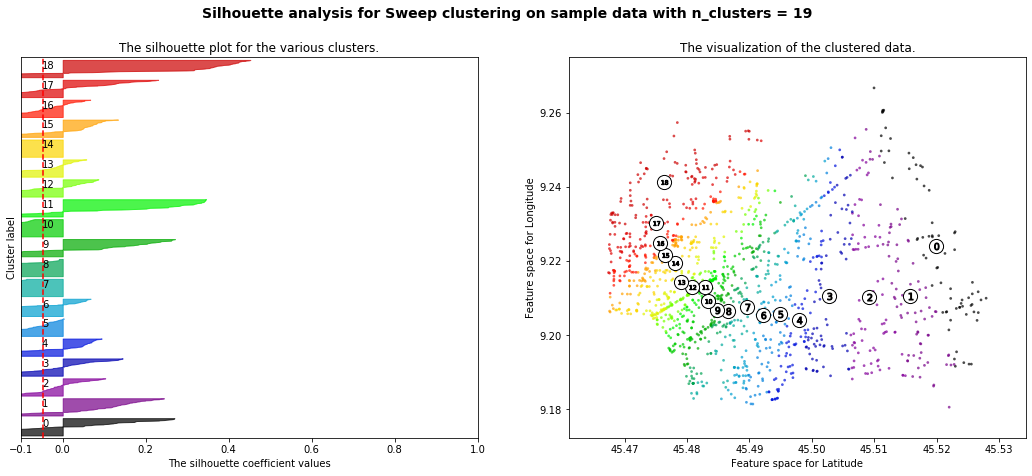

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,34861.200000,34 Km 861.20 m.,1:21:09,2:34:09,4869.800000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,40858.000000,40 Km 858.00 m.,1:33:28,2:46:28,5608.700000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,34252.200000,34 Km 252.20 m.,1:14:36,2:27:36,4476.500000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,37582.900000,37 Km 582.90 m.,1:19:33,2:32:33,4773.500000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,30562.499000,30 Km 562.50 m.,1:06:31,2:19:31,3991.600000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,31210.099000,31 Km 210.10 m.,1:09:55,2:22:55,4195.200000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,30596.700000,30 Km 596.70 m.,1:05:08,2:18:08,3908.900000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,33244.198000,33 Km 244.20 m.,1:13:24,2:26:24,4404.400000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,28208.400000,28 Km 208.40 m.,1:02:35,2:15:35,3755.900000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,27388.098000,27 Km 388.10 m.,1:02:45,2:15:45,3765.100000,73.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### SECOND VISIT #################################
For n_clusters = 19 The average silhouette_score is : -0.052906357427030606


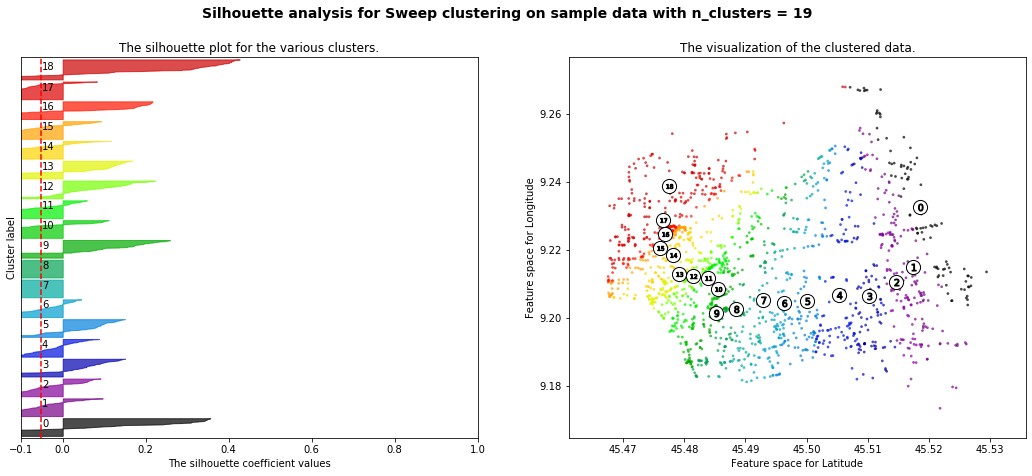

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,31161.900000,31 Km 161.90 m.,1:11:46,2:43:46,4306.400000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,39462.800000,39 Km 462.80 m.,1:27:33,2:59:33,5253.000000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,38127.400000,38 Km 127.40 m.,1:27:22,2:59:22,5242.200000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,34111.700000,34 Km 111.70 m.,1:18:40,2:50:40,4720.000000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,37777.600000,37 Km 777.60 m.,1:26:28,2:58:28,5188.700000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,35434.799000,35 Km 434.80 m.,1:22:08,2:54:08,4928.000000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,35036.800000,35 Km 36.80 m.,1:15:33,2:47:33,4533.200000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,38899.400000,38 Km 899.40 m.,1:23:51,2:55:51,5031.100000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,33547.600000,33 Km 547.60 m.,1:13:44,2:45:44,4424.100000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,30613.899000,30 Km 613.90 m.,1:08:43,2:40:43,4123.200000,92.000000,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### FIRST VISIT #################################
For n_clusters = 20 The average silhouette_score is : -0.0434183020749161


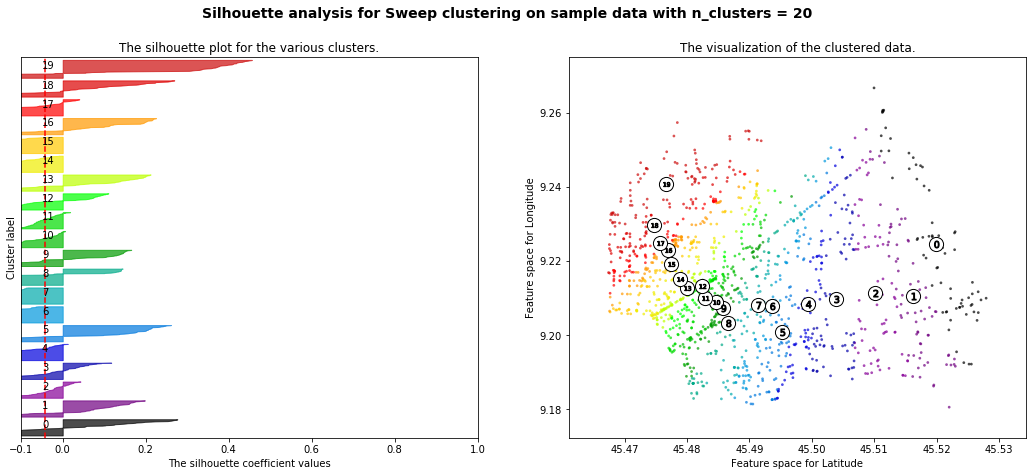

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,33581.600,33 Km 581.60 m.,1:18:01,2:27:01,4681.20,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,40554.199,40 Km 554.20 m.,1:33:32,2:42:32,5612.80,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,35176.800,35 Km 176.80 m.,1:17:34,2:26:34,4654.00,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,36927.900,36 Km 927.90 m.,1:20:10,2:29:10,4810.20,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,32366.398,32 Km 366.40 m.,1:06:07,2:15:07,3967.00,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,29383.999,29 Km 384.00 m.,1:04:46,2:13:46,3886.70,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,28135.599,28 Km 135.60 m.,1:01:24,2:10:24,3684.50,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,34421.900,34 Km 421.90 m.,1:16:20,2:25:20,4580.90,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,28725.599,28 Km 725.60 m.,1:01:06,2:10:06,3666.80,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,25082.900,25 Km 82.90 m.,0:57:47,2:06:47,3467.60,69.00,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


############################### SECOND VISIT #################################
For n_clusters = 20 The average silhouette_score is : -0.05248990924685334


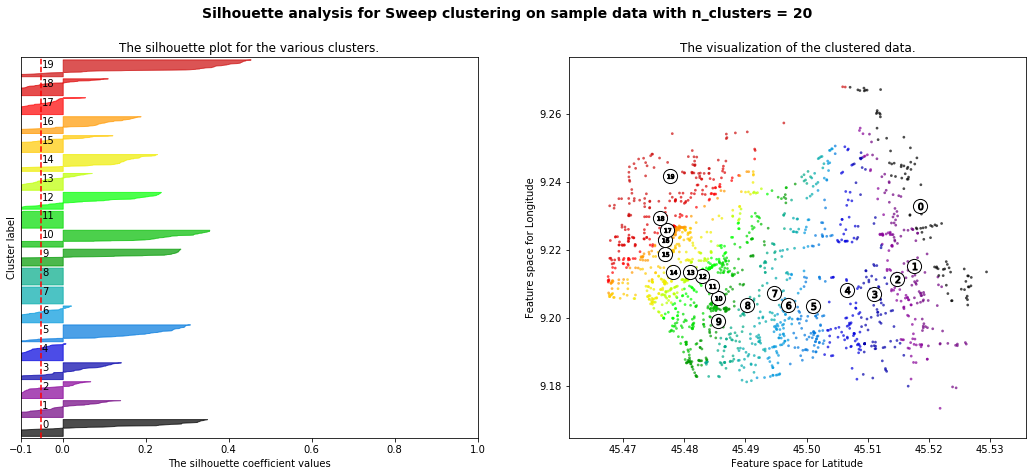

,cluster,or_dist,meters,time,time_emptying,seconds,bins,waypoints
0,0,30502.200,30 Km 502.20 m.,1:09:36,2:37:36,4176.800,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
1,1,36629.500,36 Km 629.50 m.,1:18:36,2:46:36,4716.000,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
2,2,35886.600,35 Km 886.60 m.,1:21:58,2:49:58,4918.100,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
3,3,35550.098,35 Km 550.10 m.,1:23:53,2:51:53,5033.700,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
4,4,36588.900,36 Km 588.90 m.,1:23:31,2:51:31,5011.700,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
5,5,34548.999,34 Km 549.00 m.,1:19:28,2:47:28,4768.400,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
6,6,33241.000,33 Km 241.00 m.,1:12:00,2:40:00,4320.400,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
7,7,32703.000,32 Km 703.00 m.,1:12:48,2:40:48,4368.400,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
8,8,35830.200,35 Km 830.20 m.,1:19:09,2:47:09,4749.800,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."
9,9,32979.899,32 Km 979.90 m.,1:10:43,2:38:43,4243.500,88.0,"[{""serial"": -1, ""coords"": [45.5069182, 9.26845..."


In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from importlib import reload

import a2a_clustering
import a2a_validation
import a2a_travellingsalesman

## INITIALIZATION
RANDOM_SEED = 0
ALGORITHM = "Sweep"

def a2a_doAll(INFILE_PRE):
    ''' This module does all the calculations
    CLUSTERING STEP : Does Clustering using a particular clustering algo
    VALIDATION STEP : Does Clustering Validation (Silhouette Coefficient Calculation)
    TSP STEP : Solves the TSP problem within each cluster  
    '''
    ## INPUT DATA - this is input data for 1st or 2nd visit from data prep step
    df = pd.read_csv("output/data_preparation/" + INFILE_PRE + ".csv")
    X = a2a_clustering.transform(df)
    
    ## RESULTS OUTPUT FILE-PREFIX WITH PATH
    PATH = 'output/clustering/' + ALGORITHM + '_' + INFILE_PRE + '_'
    
    ###################
    # CLUSTERING STEP #
    ###################
    n_clusters = i
    
    FILE_PREFIX = PATH +  str(n_clusters) + '_'
    
    clusterer = a2a_clustering.sweep_clustering(X, n_clusters)
    
    cluster_labels = clusterer._labels 
    df = df.assign(**{
        'Cluster_labels': cluster_labels
    })    

    centroids = np.asarray(clusterer.cluster_centers_)
    np.savetxt(FILE_PREFIX + "centroids.csv", 
        centroids, 
        header="lat,lng", 
        delimiter=",", 
        comments='')

    ###################
    # VALIDATION STEP #
    ###################

    df = a2a_validation.silhouette(df, centroids, FILE_PREFIX, ALGORITHM)
    df.to_csv(FILE_PREFIX + "clusterized_dataset.csv")

    ###################
    # TSP        STEP #
    ###################

    tsp_solved = a2a_travellingsalesman.tsp(df, FILE_PREFIX)
    tsp_solved.to_csv(FILE_PREFIX + 'tsp.csv')
    display(tsp_solved)



for i in range(15, 21):
    
    ######### First Visit
    print("############################### FIRST VISIT #################################")
    VISIT1_FILE_PRE = "first_visit.20190903" # Input file prefix
    a2a_doAll(VISIT1_FILE_PRE)
    
    ######### Second Visit
    print("############################### SECOND VISIT #################################")
    VISIT2_FILE_PRE = "second_visit.20190903" # Input file prefix
    a2a_doAll(VISIT2_FILE_PRE)